![My Logo](https://thoughtsociety.org/wp-content/uploads/2019/03/ts_notebook_header.png)

# Deep Learning Demo on the Iris Dataset with Keras

## About Tensorflow, Keras and what is a 'tensor'?

First, a tensorflow tensor is not a classical mathematical tensor. It is more of a multi-dimensional array.
Now with that out of the way:

[Tensorflow](https://en.wikipedia.org/wiki/TensorFlow) is an open-source, deep-learning framework originated by the Google Brain team. It was initially successful in identifying spam email in production.

The Tensorflow api allows different levels of abstraction to create artificial neural networks where matrix arithmetic are performed en-masse on multidensional arrays. In this way, the network may be 'trained' to recognize various aspects of images, language and sound in ways similar to how our own brain functions.

Tensorflow has been designed to accept parallel computational acceleration by GPUs which are necessary for more complex learning tasks.

[Keras](https://keras.io/) 

*Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.* 
*It is currently integrated with Tensorflow as a higher-level API.*

*Supports both convolutional networks and recurrent networks, as well as combinations of the two.*
*Runs seamlessly on CPU and GPU.*

What makes 'Keras' (polished horn in greek) cool to use is that is greatly simplifies setting up multi-dimensional deep learning networks with a fair amount of flexibility without the messy graph or session configuration required in Tensorflow. 

As you will see in this demo, we can use the sequential model which is a linear stack of layers. We can specify it in one go or do model.add's to build up and specify what goes into each such as the input shape and dimension, activation and loss functions.

[Here is a great getting started description of Keras and the sequential model](https://keras.io/getting-started/sequential-model-guide/)


### In this demo, we will use Keras to access Tensorflow functions and greatly simplify what it will take to build, train and make predictions from deep learning models.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.set()

## Shallow Network

make_moons is used to show what a good separation looks like.
After a few cells, we will see how deep learning can separate classes easily


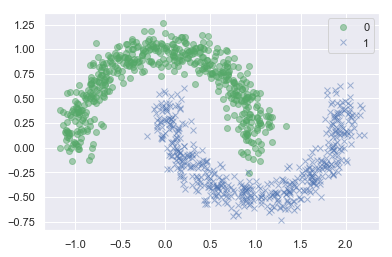

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'og', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xb', alpha=0.5)
plt.legend(['0', '1'])

In [4]:
# In our case, it has 1000 rows of two columns
X.shape

(1000, 2)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Train-Test-Split 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

### We'll use Keras since it is a built-in API to TensorFlow

Keras abstracts TensorFlow methods and classes to simplify its use


In [7]:
from keras.models import Sequential
from keras.layers import Dense

# SGD optimizer for Stochastic gradient descent
# Adam for adaptive moment estimation - also a stochastic optimizer

from keras.optimizers import SGD, Adam 

Using TensorFlow backend.


### Shallow Model

* instantiate a sequential model from Keras
* add a dense layer
* compile the optimizer (Adam), loss function (binary_crossentropy) and metrics(accuracy) prior to fitting(training)

In [8]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Fit the model with 200 epochs

model.fit(X_train, y_train, epochs=200, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [10]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 430us/step


In [11]:
print("Results: Loss = {:0.3f}\t Accuracy = {:0.3f}" .format(results[0],results[1]))

# loss and accuracy

Results: Loss = 0.318	 Accuracy = 0.837


### Let's create a plot_decision_boundary function

given the model and X,y : (makemoons data)

create axes and grab predictions from the model, reshape it and plot a figure with contour 

**A little magical in a way**

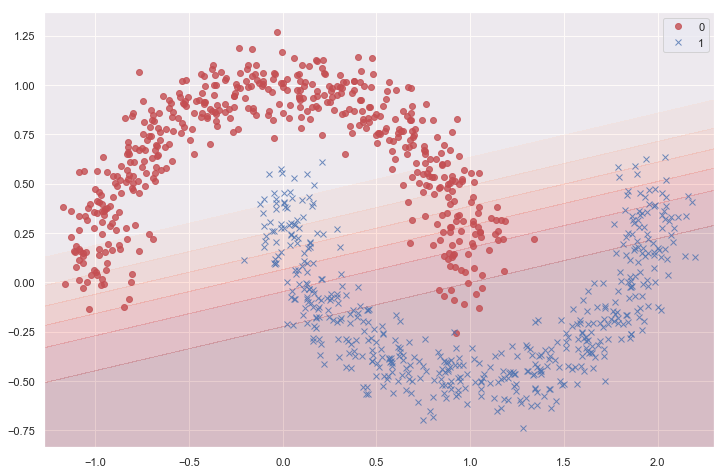

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='Reds', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.8)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xb', alpha=0.8)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Build a multilayer Deep Learning model

In [13]:
# Similar to a pipeline in SciKitLearn -
# Add 4 Dense layers with hyperbolic tangent activation functions
# Add 2 Dense layers with same
# Add 1 Sigmoid A.F.
# Compile in an Adam optimizer , b_c loss function and the accuracy metric


model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

# Ok, what is Adam? It's an 'optimizer' standing for 'adaptive moment estimation' 
# Adam is a stochastic gradient descent optimizer that can update network weights 
# iteratively based on training data. 
# huh? The learning rate (alpha) is a step size.
# If lr is larger it results in faster initial learning before the rate is updated
# Lower lr slows down the rate 

# At any rate the last step was to compile everything we assembled in layers and add the optimizer, 
# loss function and metrics
# This was the heart of Keras in our quest to classify the two moon-shaped scatter data


### To understand why we can use binary_crossentropy as the loss function in a binary classification model

and also the sigmoid activation function check this [Medium post out](https://medium.com/aidevnepal/for-sigmoid-funcion-f7a5da78fec2).

Binary classification is suited to sigmoid and b_crossentropy. In multiclass classification, Softmad and b_cr_en works best.

In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
deep_results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 772us/step


In [16]:
print("Deep Results: Loss = {:0.3f}\t Accuracy = {:0.3f}" .format(deep_results[0],deep_results[1]))

Deep Results: Loss = 0.002	 Accuracy = 1.000


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


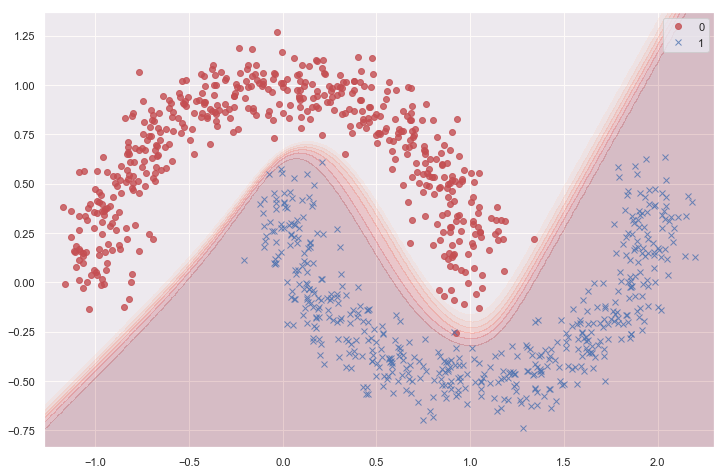

In [19]:
# Now let's see how we did using a deep learning model to classify these two moons
    
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/thoughtsociety/ads_track4/master/datasets/Iris.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [22]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [23]:
# Get rid of 'Id' which is unnecessary

df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# Do a seaborn pairplot of the iris dataset, colored by 'Species'

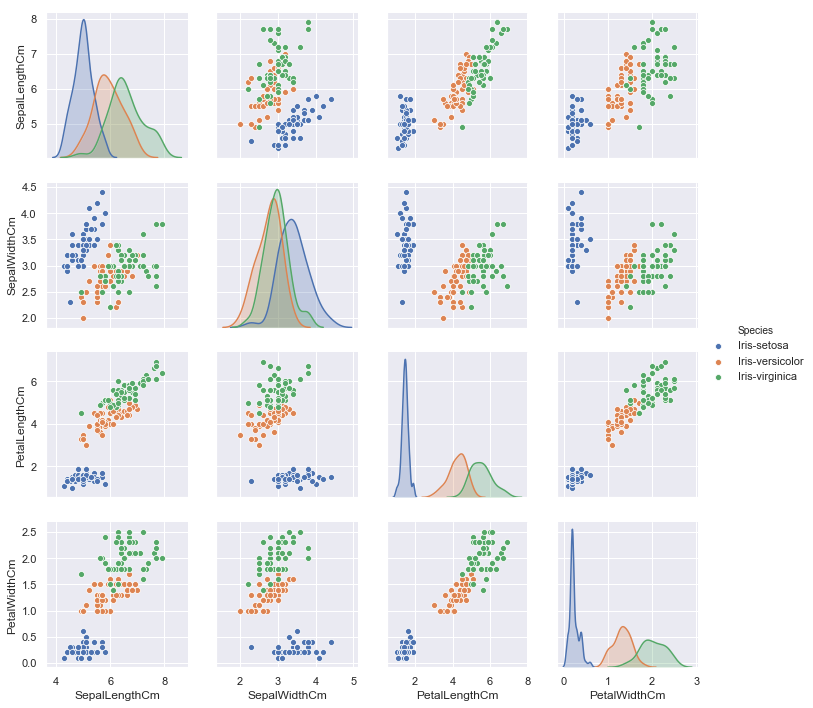

In [25]:
import seaborn as sns
sns.pairplot(df, hue="Species")

In [26]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# Assign just the feature data to X, exluding the target, 'Species'

X = df.drop('Species', axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Establish an array of the unique target names of which there are three (multi-class classification)

target_names = df['Species'].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
# Alternative to get_dummies to enumerate categorical data into numerical
# We can use dictionary comprehension for this

target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [30]:
# Here is a clever way to create the target column with species classes remapped to a numerical object

y= df['Species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [52]:
# The keras utility that converts the y (targets) to a 3xn array of targets

from keras.utils.np_utils import to_categorical

In [53]:
y_cat = to_categorical(y)

In [54]:
# we now have the y_cat as 3xn array of species (targets)
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [55]:
# Do an 80/20 split

X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.2)

### Multi-class classification at work

add 3 dense layers with softmax activation
compile in Adam optimizer, categorical_crossentropy with accuracy metrics

In [56]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### This will go quick due to such a small sampling of the data

Time to fit (train) 

In [57]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 1s 9ms/step - loss: 2.8094 - acc: 0.1481 - val_loss: 1.5396 - val_acc: 0.2500
Epoch 2/20
108/108 [==============================] - 0s 101us/step - loss: 2.0536 - acc: 0.3241 - val_loss: 1.4773 - val_acc: 0.2500
Epoch 3/20
108/108 [==============================] - 0s 114us/step - loss: 1.0653 - acc: 0.5278 - val_loss: 0.8920 - val_acc: 0.7500
Epoch 4/20
108/108 [==============================] - 0s 142us/step - loss: 1.0887 - acc: 0.6759 - val_loss: 0.6524 - val_acc: 0.7500
Epoch 5/20
108/108 [==============================] - 0s 123us/step - loss: 0.6821 - acc: 0.7037 - val_loss: 0.6976 - val_acc: 0.5833
Epoch 6/20
108/108 [==============================] - 0s 130us/step - loss: 0.6637 - acc: 0.6759 - val_loss: 0.4900 - val_acc: 0.7500
Epoch 7/20
108/108 [==============================] - 0s 134us/step - loss: 0.4805 - acc: 0.7593 - val_loss: 0.4259 - val_acc: 0.7500
Epoch 8/20
108/108 

In [58]:
# Prediction

y_pred = model.predict(X_test)

In [63]:
# Find which column has the maximum value - for each row in y_test and y_pred
# We can then use that for inputs to the classification report

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [62]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 12]])